In [1]:
# Załadowanie bibliotek, oraz danych
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# Dodanie kolumny z rodzajem kwiatu
df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Podzielenie danych na X i y
X = df.drop(['variety'], axis=1)
y = df['variety']

In [4]:
# Podzielenie danych na dane treningowe, oraz na dane testowe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
# Przeskalowanie danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [6]:
# Nakarmienie modelu danymi treningowymi
from GaussianNaiveBayesClassifier import GaussianNaiveBayesClassifier

gnb = GaussianNaiveBayesClassifier()

gnb.fit(X_train, y_train)

In [7]:
# Wykonanie przewidywań na wyuczonym modelu
y_pred = gnb.predict(X_test)

In [8]:
# Sprawdzenie dokładności, oraz testowanie czy istnieje overfitting lub underfitting
print('Wynik danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Wynik danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))

Wynik danych treningowych: 0.9333
Wynik danych testowych: 0.9778


In [9]:
# Obliczenie precyzji modelu
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)

print("Precyzja dla każdej klasy:", precision)

Precyzja dla każdej klasy: [1.         1.         0.93333333]


<Axes: >

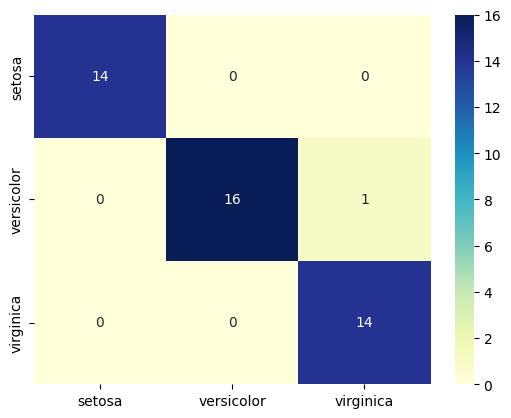

In [10]:
# Wykorzystanie macierzy konfuzji do narysowania wykresu ciepłowego
from sklearn.metrics import confusion_matrix

class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [11]:
# Zapisanie pierwszych 10 prawdopodobieństw do dataframe'u i wyświetlenie go
y_pred_prob = gnb.predict_proba(X_test)[0:10]

class_labels = sorted(gnb.classes)

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=class_labels)

y_pred_prob_df

TypeError: 'float' object is not subscriptable

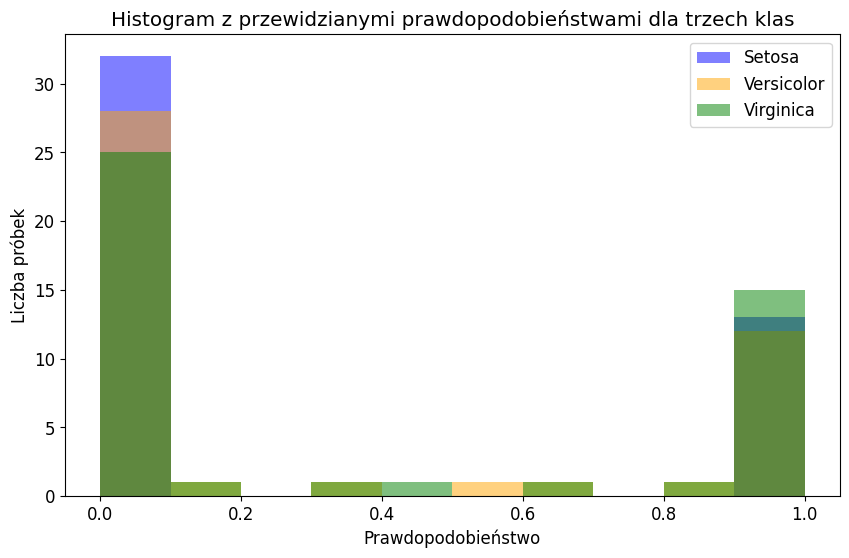

In [120]:
# Przypisz prawdopodobieństwa i narysuj wykresy
import matplotlib.pyplot as plt
import numpy as np

proba_matrix = np.array([list(probs.values()) for probs in gnb.predict_proba(X_test)])

y_pred_setosa = proba_matrix[:, 0]
y_pred_versicolor = proba_matrix[:, 1]
y_pred_virginica = proba_matrix[:, 2]

plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))

plt.hist(y_pred_setosa, bins=10, alpha=0.5, label='Setosa', color='blue')
plt.hist(y_pred_versicolor, bins=10, alpha=0.5, label='Versicolor', color='orange')
plt.hist(y_pred_virginica, bins=10, alpha=0.5, label='Virginica', color='green')

plt.title('Histogram z przewidzianymi prawdopodobieństwami dla trzech klas')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Liczba próbek')
plt.legend()

plt.show()
